In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')


df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


#Motivación: 

El análisis del riesgo crediticio es de vital importancia en el sector financiero en donde me encuentro interesado, ya que permite evaluar la probabilidad de incumplimiento de los clientes y tomar decisiones fundamentadas en términos de otorgamiento de crédito, tasas de interés y límites de crédito. Este dataset ha sido creado con la motivación de proporcionar una herramienta confiable y actualizada que permita a los analistas y profesionales comprender mejor los factores que influyen en el riesgo crediticio y desarrollar estrategias efectivas de gestión del riesgo.



#Audiencia: 

El dataset de riesgo crediticio está dirigido a analistas, científicos de datos, profesionales del sector financiero y cualquier persona interesada en el estudio y la evaluación del riesgo crediticio. Puede ser utilizado en instituciones financieras, empresas de calificación crediticia, agencias reguladoras, investigadores académicos y otros actores involucrados en la gestión y análisis del riesgo crediticio.

#Analisis exlporatorio de datos(EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.shape

(32581, 12)

In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df.loan_int_rate.unique()

array([16.02, 11.14, 12.87, 15.23, 14.27,  7.14, 12.42, 11.11,  8.9 ,
       14.74, 10.37,  8.63,  7.9 , 18.39, 10.65, 20.25, 18.25, 10.99,
        7.49, 16.77, 17.58,  7.29, 14.54, 12.68, 17.74,  9.32,  9.99,
       12.84, 11.12,  6.62, 14.17, 13.85, 13.49,  7.51, 16.89,   nan,
       17.99, 12.69,  7.88, 19.41, 10.38, 15.33, 16.45, 18.62, 15.96,
       11.48,  5.99, 11.58, 15.7 , 15.99, 14.84, 14.42,  6.99, 13.61,
        9.91, 13.48, 12.98, 13.57, 15.68, 13.06, 15.62, 11.71,  8.88,
       12.18, 13.99,  5.42, 12.73, 11.49, 19.91, 11.83, 14.59,  9.64,
       16.35, 18.67, 10.08, 10.36, 12.23, 16.07, 14.22, 14.79, 13.22,
       11.86, 13.43, 15.28, 17.93,  9.25, 10.62, 18.43, 11.36, 15.65,
       13.04, 17.04, 14.83, 14.65, 16.82, 10.25, 14.96, 11.99,  8.49,
        6.17, 16.32, 14.35, 15.21, 14.09, 17.49, 13.92, 16.49,  5.79,
       13.11,  6.54, 12.53, 15.95, 10.74, 15.27, 14.72, 13.35,  7.68,
       14.46, 13.47,  6.03, 12.92, 18.64, 16.7 , 18.3 ,  9.63, 14.7 ,
       15.37, 14.26,

In [ ]:
df.person_emp_length.unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [ ]:
df['person_emp_length'] = df['person_emp_length'].fillna(0)

In [ ]:
df.dropna(axis = 0, inplace=True)

In [ ]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df.shape

(29465, 12)

---
#Hipótesis 1: 
La duración del empleo influye en el historial crediticio de una persona.

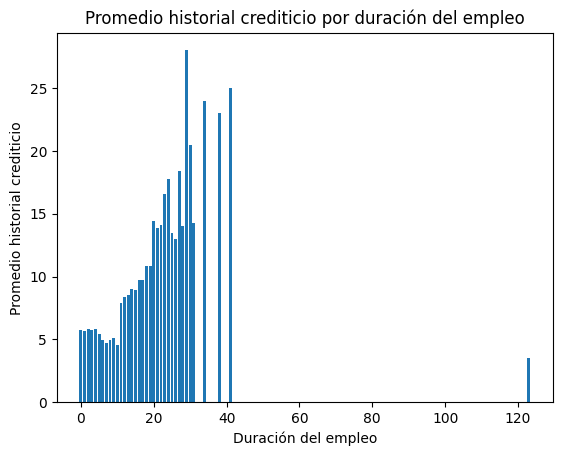

In [ ]:

# Calcular el historial crediticio promedio por duración del empleo
promedios = df.groupby('person_emp_length')['cb_person_cred_hist_length'].mean()


# Crear el gráfico de barras
plt.bar(promedios.index, promedios.values)
plt.xlabel('Duración del empleo')
plt.ylabel('Promedio historial crediticio')
plt.title('Promedio historial crediticio por duración del empleo')
plt.show()

#Conclusion / insight
Este insight sugiere que existe una asociación positiva entre la duración del empleo y la calidad del historial crediticio. Las personas con una duración de empleo más larga tienden a tener un promedio de historial crediticio más alto. Esto puede indicar que el tiempo de empleo sostenido puede tener un impacto positivo en la capacidad de las personas para mantener un buen historial crediticio.

---

#Hipótesis 2: 

Existe una relación entre el porcentaje del préstamo con respecto al ingreso y el incumplimiento del préstamo.

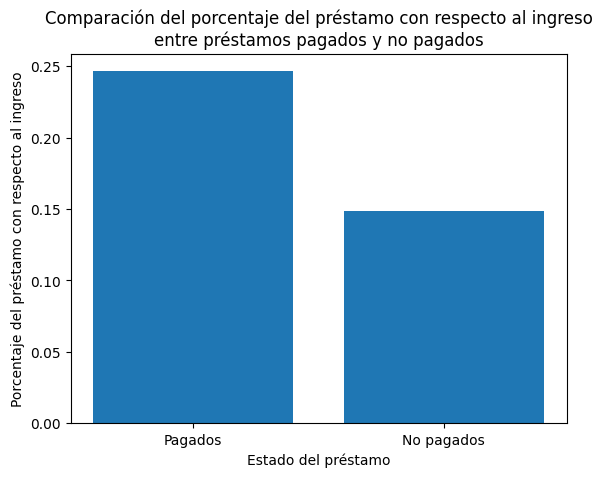

In [ ]:

# Separar los datos según el estado del préstamo
pagados = df[df['loan_status'] == 1]
no_pagados = df[df['loan_status'] == 0]

# Calcular los promedios de porcentaje del préstamo con respecto al ingreso
promedio_pagados = pagados['loan_percent_income'].mean()
promedio_no_pagados = no_pagados['loan_percent_income'].mean()

# Crear el gráfico de barras comparativo
plt.bar(['Pagados', 'No pagados'], [promedio_pagados, promedio_no_pagados])
plt.xlabel('Estado del préstamo')
plt.ylabel('Porcentaje del préstamo con respecto al ingreso')
plt.title('Comparación del porcentaje del préstamo con respecto al ingreso\nentre préstamos pagados y no pagados')
plt.show()

#Conclusion / insight


Basado en el análisis y el gráfico comparativo del porcentaje del préstamo con respecto al ingreso entre préstamos pagados y no pagados, podemos obtener un insight importante:

El insight obtenido del gráfico muestra una diferencia significativa en el porcentaje del préstamo con respecto al ingreso entre los préstamos pagados y los no pagados. Es evidente que los préstamos que no se pagaron tienen un porcentaje más alto en relación a los ingresos en comparación con los préstamos que se pagaron correctamente.

Este insight sugiere que las personas que solicitan préstamos con un porcentaje alto en relación a sus ingresos tienen más probabilidades de incumplir el pago. Esto puede deberse a que, cuando el porcentaje del préstamo es elevado, las personas pueden enfrentar dificultades financieras para cumplir con las obligaciones de pago.

---